# Parameters tuning
Find the optimal parameter for each algorithm


In [1]:
%load_ext autoreload
%autoreload 2

from evaluator import evaluate
from bandits import LinUCB, Ucb1, Egreedy
from matplotlib import pyplot as plt
import numpy as np


Bad key "text.kerning_factor" on line 4 in
/home/mand/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
%%time
import dataset
files = ("dataset/R6/ydata-fp-td-clicks-v1_0.20090502",'dataset/R6/ydata-fp-td-clicks-v1_0.20090503')
dataset.get_yahoo_events(files)

7646058 events with 62 articles
CPU times: user 3min 43s, sys: 4.19 s, total: 3min 48s
Wall time: 3min 48s


In [3]:
_, deploy_ctr = evaluate(Egreedy(1))
rnd_ctr = deploy_ctr[-1]

egreedy (ε=1)       0.0319    51.2s


In [4]:
def plot_results(tests):
    
    learn_ctrs = []
    deploy_ctrs = []

    for test in tests:
        learn, deploy = evaluate(test)
        learn = learn[1000:]
        if hasattr(test, 'e'):
            plt.plot(learn, label="ε={}".format(test.e))
        else:
            plt.plot(learn, label="α={}".format(test.alpha))
        
        learn_ctrs.append(learn[-1]/rnd_ctr)   
        deploy_ctrs.append(deploy[-1]/rnd_ctr) 

    plt.title("Learning bucket")
    plt.xlabel("T")
    plt.ylabel("CTR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    
    if hasattr(test, 'e'):
        param_values = [x.e for x in tests]
        plt.xlabel("ε")
    else:
        param_values = [x.alpha for x in tests]
        plt.xlabel("α")
    plt.plot(param_values, learn_ctrs,marker='o')
    plt.title('Learning bucket')
    plt.ylabel("CTR lift")
    plt.show()


    if hasattr(test, 'e'):
        plt.xlabel("ε")
    else:
        plt.xlabel("α")
    plt.ylabel("CTR lift")
    plt.plot(param_values, deploy_ctrs,marker='o')
    plt.title('Deployment bucket')
    plt.show()

    best_idx = np.argmax(deploy_ctrs)
    print('Best parameter:',tests[best_idx].algorithm)

## Results for E-greedy

egreedy (ε=0.1)     0.0444    38.2s
egreedy (ε=0.2)     0.0404    41.8s
egreedy (ε=0.3)     0.038     44.9s
egreedy (ε=0.4)     0.0374    47.3s
egreedy (ε=0.5)     0.0365    49.6s
egreedy (ε=0.6)     0.0348    50.0s
egreedy (ε=0.7)     0.0341    51.0s
egreedy (ε=0.8)     0.0336    53.1s
egreedy (ε=0.9)     0.0327    53.2s


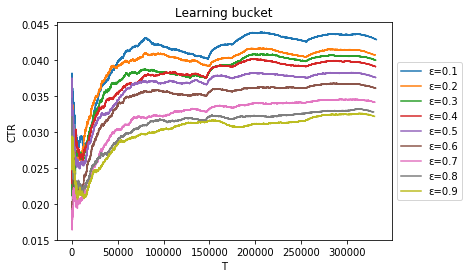

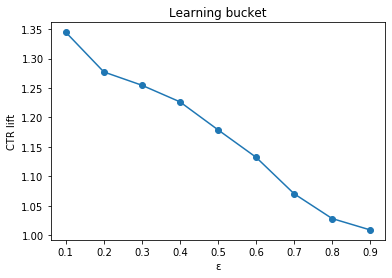

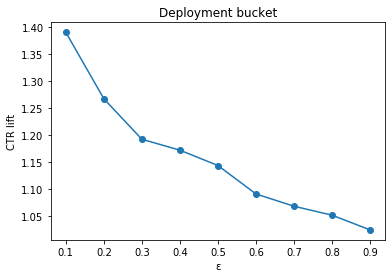

Best parameter: egreedy (ε=0.1)
CPU times: user 7min 8s, sys: 1.88 s, total: 7min 10s
Wall time: 7min 10s


In [5]:
%%time
epsilon_values = np.arange(0.1,1,0.1)
tests = [Egreedy(e) for e in epsilon_values]
plot_results(tests)

## Results for UCB 

UCB1 (α=0.1)        0.0419    1.3m
UCB1 (α=0.3)        0.0435    1.3m
UCB1 (α=0.5)        0.0418    1.3m
UCB1 (α=0.7)        0.0389    1.3m
UCB1 (α=0.9)        0.0372    1.3m
UCB1 (α=1.1)        0.0361    1.3m
UCB1 (α=1.3)        0.0379    1.3m


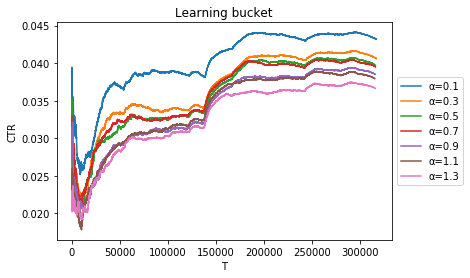

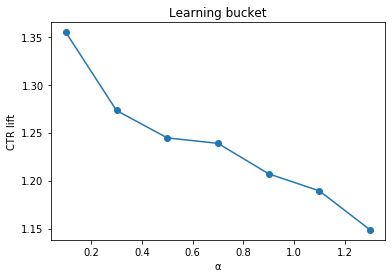

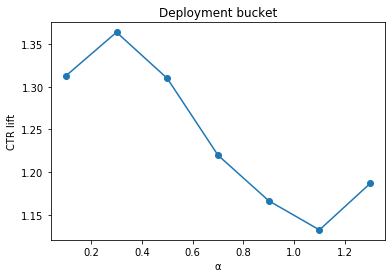

Best parameter: UCB1 (α=0.3)
CPU times: user 9min 5s, sys: 3.28 s, total: 9min 9s
Wall time: 9min 6s


In [6]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [Ucb1(a) for a in alpha_values]
plot_results(tests)

## Results for LinUCB

LinUCB (α=0.1)      0.0485    13.2m
LinUCB (α=0.3)      0.051     13.0m
LinUCB (α=0.5)      0.0509    12.9m
LinUCB (α=0.7)      0.0474    12.9m
LinUCB (α=0.9)      0.0476    13.0m
LinUCB (α=1.1)      0.0464    12.8m
LinUCB (α=1.3)      0.0459    12.9m


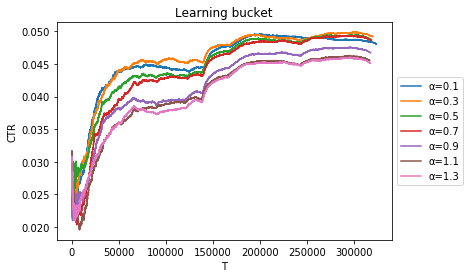

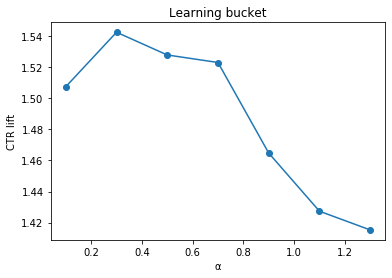

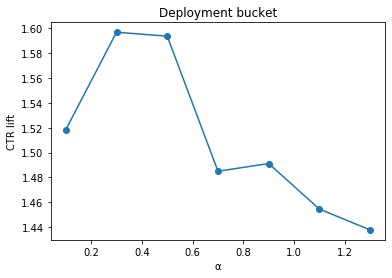

Best parameter: LinUCB (α=0.3)
CPU times: user 1h 30min 33s, sys: 9.82 s, total: 1h 30min 43s
Wall time: 1h 30min 44s


In [7]:
%%time
alpha_values = np.arange(0.1,1.4,0.2)
tests = [LinUCB(a) for a in alpha_values]
plot_results(tests)